In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from utilities import *
from statsmodels.tsa.seasonal import seasonal_decompose;

c:\Users\maurizio\anaconda\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [3]:
df = pd.read_csv('../dati/serie-storiche-ecommerce.csv', quotechar = "'", parse_dates = ['data'], decimal = ',')

df = df.assign(year = df.data.dt.year,
               month = df.data.dt.month,
               day = df.data.dt.day,
               DayOfWeek = df.data.dt.dayofweek)

In [4]:
processed_df = fillna_pivot(df).reset_index()

In [5]:
decompose_df = processed_df.melt(id_vars = 'data', value_name = 'totale')

In [6]:
total_revenue = data = decompose_df.groupby('data')['totale'].sum().reset_index()

In [7]:
total_revenue = total_revenue[total_revenue.totale > 0]

In [8]:
result = seasonal_decompose(total_revenue.totale, model='multiplicative', period= 365)

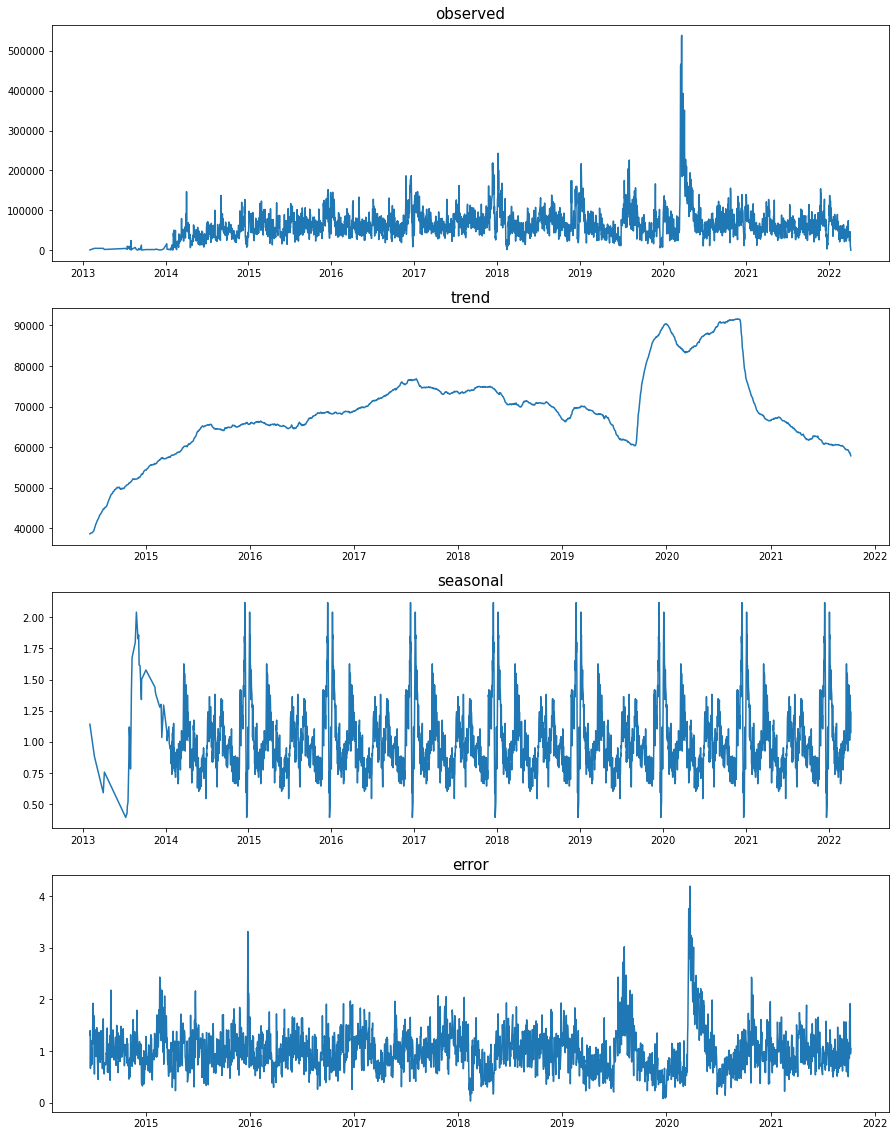

In [9]:
fig, ax = plt.subplots(4,1, figsize = (15,20))
ax[0].plot(total_revenue.data, result.observed)
ax[0].set_title('observed', fontsize = 15)
ax[1].plot(total_revenue.data, result.trend)
ax[1].set_title('trend', fontsize = 15)
ax[2].plot(total_revenue.data, result.seasonal)
ax[2].set_title('seasonal', fontsize = 15)
ax[3].plot(total_revenue.data,result.resid)
ax[3].set_title('error', fontsize = 15);